In [29]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv("data/df_numeric.csv")

In [31]:
# check spread of data with only 2 posible values

from tabulate import tabulate

# Define the columns to count
columns_to_count = ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History']

# Create an empty list to hold the value counts
value_counts = []

# Loop over the columns and append the value counts to the list
for col in columns_to_count:
    value_counts.append([col, df[col].value_counts()[1], df[col].value_counts()[0]])

# Print the table
print(tabulate (value_counts, 
                headers=['Column', '1', '0'], 
                tablefmt="fancy_grid"))

╒════════════════╤═════╤═════╕
│ Column         │   1 │   0 │
╞════════════════╪═════╪═════╡
│ Gender         │ 445 │  98 │
├────────────────┼─────┼─────┤
│ Married        │ 350 │ 193 │
├────────────────┼─────┼─────┤
│ Education      │ 429 │ 114 │
├────────────────┼─────┼─────┤
│ Self_Employed  │  72 │ 471 │
├────────────────┼─────┼─────┤
│ Credit_History │ 458 │  85 │
╘════════════════╧═════╧═════╛


EDA of Applicant and Co-Applicant Income

In [51]:
# Calculate the mean of both
mean_applicant = df['ApplicantIncome'].mean()
mean_coapplicant = df['CoapplicantIncome'].mean()

# Calculate the median of both
median_applicant = df['ApplicantIncome'].median()
median_coapplicant = df['CoapplicantIncome'].median()

# Print results
print("Mean of Applicant income:", mean_applicant)
print("Mean of Co-Applicant income:", mean_coapplicant)
print("Median of Applicant income:", median_applicant)
print("Median of Co-Applicant income:", median_coapplicant)

Mean of Applicant income: 4582.503891050584
Mean of Co-Applicant income: 1423.3126848027948
Median of Applicant income: 3716.5
Median of Co-Applicant income: 1146.5


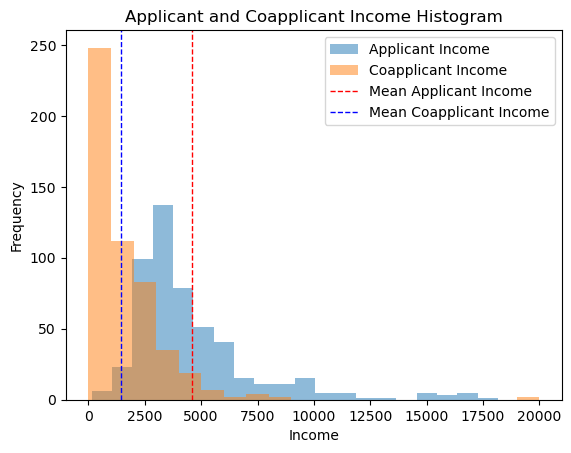

In [53]:
# histogram of both incomes
plt.hist(df['ApplicantIncome'], bins=20, alpha=0.5, label='Applicant Income')
plt.hist(df['CoapplicantIncome'], bins=20, alpha=0.5, label='Coapplicant Income')

# set the title and axis labels
plt.title('Applicant and Coapplicant Income Histogram')
plt.xlabel('Income')
plt.ylabel('Frequency')

# plot means
plt.axvline(mean_applicant, color='red', linestyle='dashed', linewidth=1, label='Mean Applicant Income')
plt.axvline(mean_coapplicant, color='blue', linestyle='dashed', linewidth=1, label='Mean Coapplicant Income')

# add the legend
plt.legend()

# show the plot
plt.show()

In [33]:
# Applicant and co-applicant outliers
print (df [df['ApplicantIncome'] > 20000] .shape[0])
print (df [df['CoapplicantIncome'] > 20000] .shape[0])

#drop the 9 outliers
df = df [df['ApplicantIncome'] <= 20000]

# do the same for co-applicant income
df = df [df['CoapplicantIncome'] <= 20000]

9
1


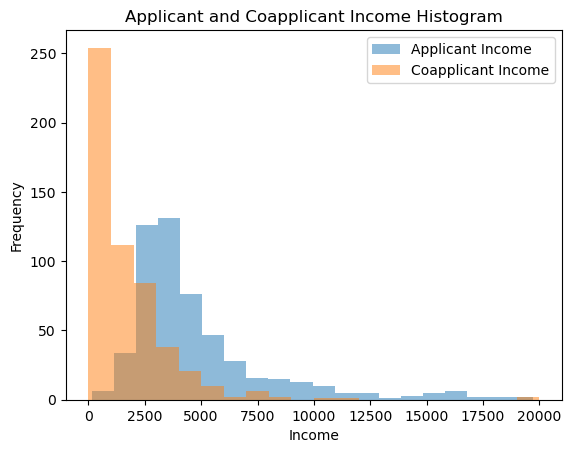

In [34]:
# histogram of both incomes
plt.hist(df['ApplicantIncome'], bins=20, alpha=0.5, label='Applicant Income')
plt.hist(df['CoapplicantIncome'], bins=20, alpha=0.5, label='Coapplicant Income')

# set the title and axis labels
plt.title('Applicant and Coapplicant Income Histogram')
plt.xlabel('Income')
plt.ylabel('Frequency')

# add the legend
plt.legend()

# show the plot
plt.show()

Log transform of Applicant and Co-Applicant Income

In [35]:
# too many zeros in co-applicant income to do successful log transform, so use combined

In [36]:
# First, need to change all 0s to 0.1
df['ApplicantIncome'] = df['ApplicantIncome'].apply(lambda x: 0.1 if x == 0 else x)
df['CoapplicantIncome'] = df['CoapplicantIncome'].apply(lambda x: 0.1 if x == 0 else x)

# Combine both incomes as total income 
df["TotalIncome"] = df["ApplicantIncome"] + df["CoapplicantIncome"]

# log transform total_income
df['TotalIncome_log'] = np.log(df['TotalIncome'])

In [54]:
mean_total_log = df['TotalIncome_log'].mean()
print (mean_total_log)

8.597422739583449


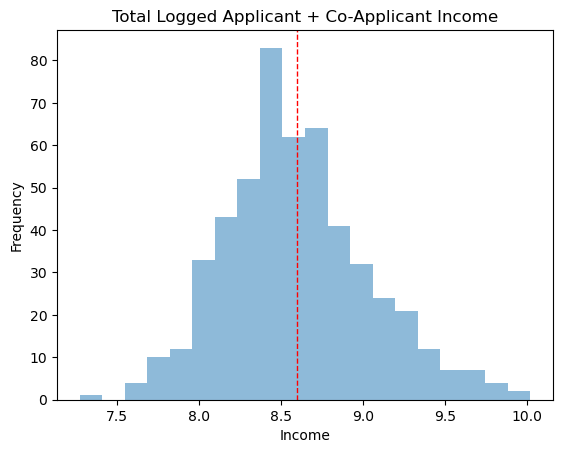

In [56]:
# histogram of both incomes
plt.hist(df['TotalIncome_log'], bins=20, alpha=0.5)

# set the title and axis labels
plt.title('Total Logged Applicant + Co-Applicant Income')
plt.xlabel('Income')
plt.ylabel('Frequency')

plt.axvline(mean_total_log, color='red', linestyle='dashed', linewidth=1, label='Mean Applicant Income')

# add the legend, plot it
plt.show()

Loan Amount

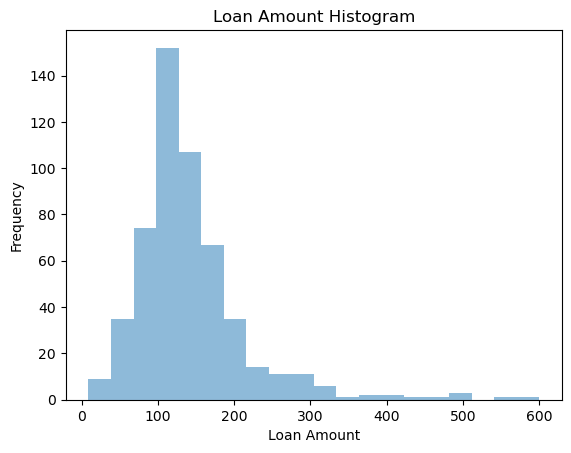

In [38]:
# histogram of loan amount
plt.hist(df['LoanAmount'], bins=20, alpha=0.5)

# set the title and axis labels
plt.title('Loan Amount Histogram')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

# show the plot
plt.show()

In [39]:
# clearly there are some outliers
print (df [df['LoanAmount'] > 300] .shape[0])

#drop the 19 outliers
df = df [df['LoanAmount'] <= 300]

19


In [40]:
# try logging Loan Amount
df['LoanAmount_log'] = np.log(df['LoanAmount'])

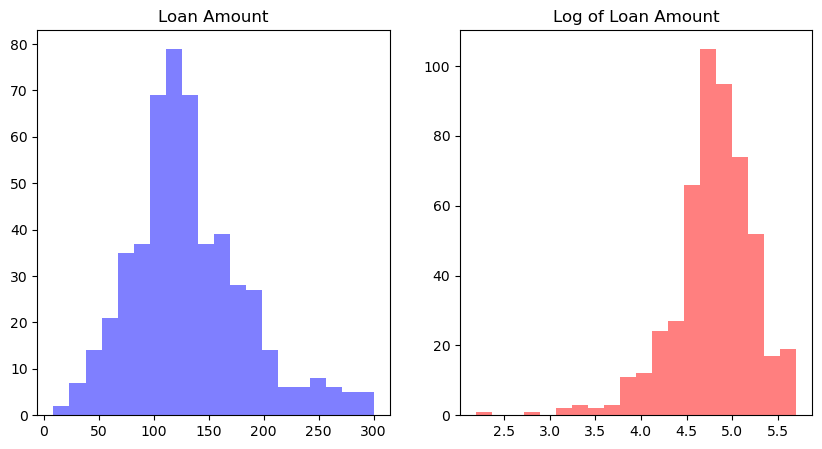

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first histogram on the first axis
ax[0].hist(df['LoanAmount'], bins=20, color='blue', alpha=0.5)
ax[0].set_title('Loan Amount')

# Plot the second histogram on the second axis
ax[1].hist(df['LoanAmount_log'], bins=20, color='red', alpha=0.5)
ax[1].set_title('Log of Loan Amount')

# Show the plot
plt.show()


In [42]:
# because I dropped outliers, the unlogged version seems less skewed and better distributed

Select final Columns to include

In [46]:
cols_to_inc =   ['Gender', 'Married', 'Education', 'Self_Employed', 'LoanAmount', \
                'Loan_Amount_Term', 'Credit_History', 'Property_Area_Rural', \
                'Property_Area_Semiurban', 'Property_Area_Urban', 'Dependents_0', \
                'Dependents_1', 'Dependents_2', 'Dependents_3+', 'TotalIncome_log', 'Loan_Status']

df[cols_to_inc].to_csv("data/df_numeric_transformed.csv")